## Name- Rishi Jain
## Email- Rishijainai262003@gmail.com

### 1. Notebook Setup

#### 1.1 Notebook Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import randint,uniform

#### 1.2 Importing Data

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 1.3 Data Examination

In [4]:
#To check if any null value present
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
#To check if there is any kind of duplicate row
df.duplicated().sum()

0

In [6]:
df.describe() # To check mean, min, max value etc

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.shape

(1000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 2. Feature Engineering

In [9]:
print("Maximum Reading Score",df['reading score'].max())
print("Maximum Writing Score",df['writing score'].max())

Maximum Reading Score 100
Maximum Writing Score 100


In [10]:
#Function to convert marks into percentage
def marks_to_percentage(marks):
  return marks*100/100

In [11]:
#Creating new columns of writing score and reading score in percentage
df['writing_score_percentage'] = df['writing score'].apply(marks_to_percentage)
df['reading_score_percentage'] = df['reading score'].apply(marks_to_percentage)

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,writing_score_percentage,reading_score_percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,74.0,72.0
1,female,group C,some college,standard,completed,69,90,88,88.0,90.0
2,female,group B,master's degree,standard,none,90,95,93,93.0,95.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,44.0,57.0
4,male,group C,some college,standard,none,76,78,75,75.0,78.0


In [13]:
#Function to convert marks into grades
def marks_to_grade(marks):
  if marks>=90:
    return 'AA'
  elif marks >= 80:
    return 'AB'
  elif marks >=70:
    return 'BB'
  elif marks >= 60:
    return 'BC'
  elif marks >= 50:
    return 'CC'
  elif marks >= 40:
    return 'CD'
  elif marks >= 30:
    return 'DD'
  else:
    return 'FF'

In [14]:
df['reading_score_grade'] = df['reading_score_percentage'].apply(marks_to_grade)

In [15]:
df['writing_score_grade'] = df['writing_score_percentage'].apply(marks_to_grade)

In [16]:
df.head() # 2 New grades columns are added

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,writing_score_percentage,reading_score_percentage,reading_score_grade,writing_score_grade
0,female,group B,bachelor's degree,standard,none,72,72,74,74.0,72.0,BB,BB
1,female,group C,some college,standard,completed,69,90,88,88.0,90.0,AA,AB
2,female,group B,master's degree,standard,none,90,95,93,93.0,95.0,AA,AA
3,male,group A,associate's degree,free/reduced,none,47,57,44,44.0,57.0,CC,CD
4,male,group C,some college,standard,none,76,78,75,75.0,78.0,BB,BB


### 3. Exploratory Data Analysis

#### 3.1 Data Visualization

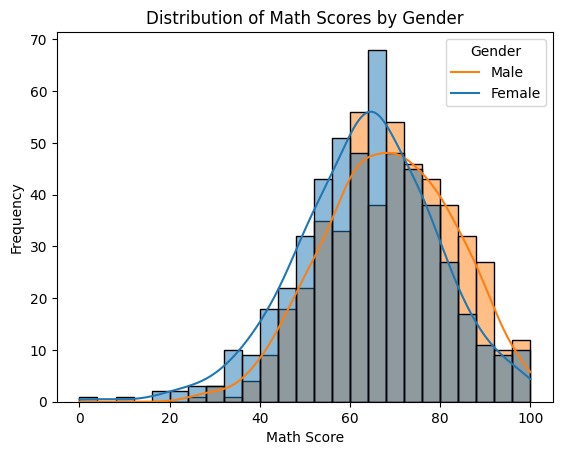

In [17]:
#Distribution of Math Scores by Gender
sns.histplot(data=df, x='math score', hue='gender',  kde=True,legend=False)
plt.title('Distribution of Math Scores by Gender')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.legend(labels=['Male', 'Female'],title='Gender')
plt.show()

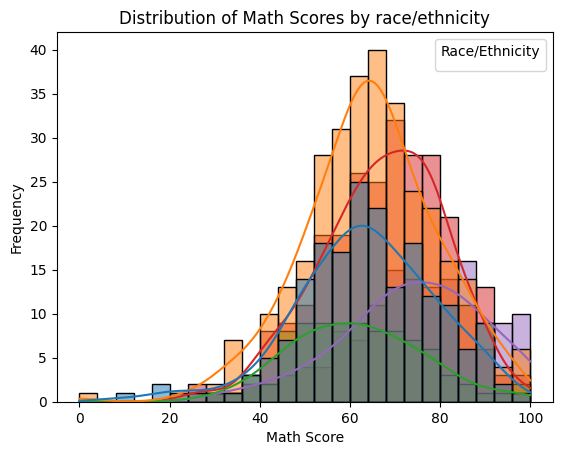

In [18]:
#Distribution of Math Scores by race/ethnicity
sns.histplot(data=df, x='math score', hue='race/ethnicity', kde=True)
plt.title('Distribution of Math Scores by race/ethnicity')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.legend(title='Race/Ethnicity')
plt.show()

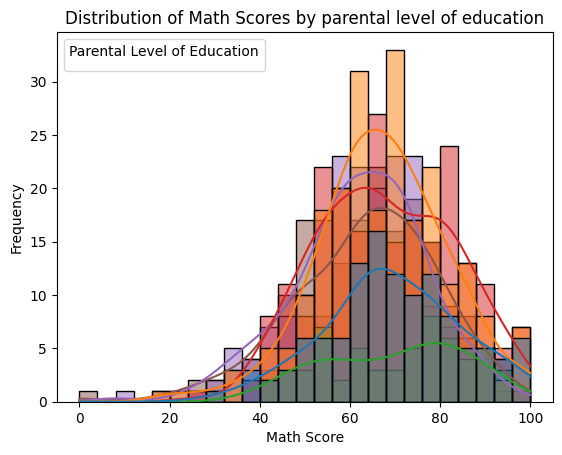

In [19]:
#Distribution of Math Scores by parental level of education
sns.histplot(data=df, x='math score', hue='parental level of education', kde=True)
plt.title('Distribution of Math Scores by parental level of education')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.legend(title='Parental Level of Education')
plt.show()

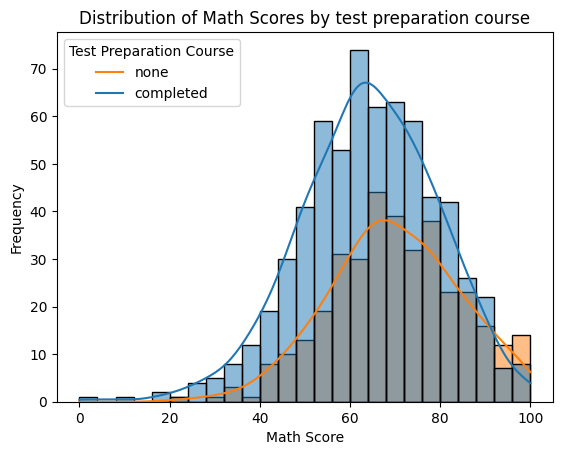

In [20]:
#Distribution of Math Scores by test preparation course
sns.histplot(data=df, x='math score', hue='test preparation course', kde=True)
plt.title('Distribution of Math Scores by test preparation course')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.legend(labels =['none','completed'] ,title='Test Preparation Course')
plt.show()

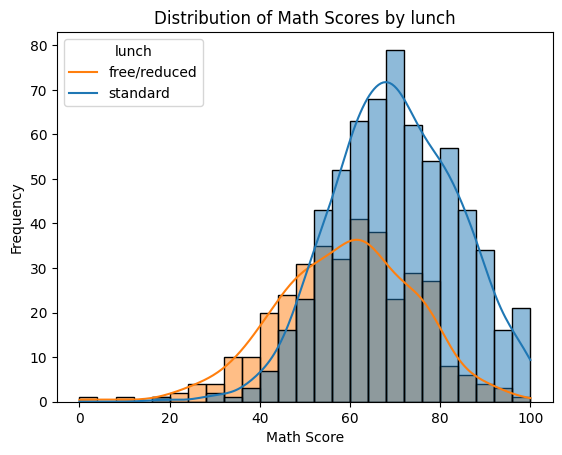

In [21]:
#Distribution of Math Scores by lunch
sns.histplot(data=df, x='math score', hue='lunch', kde=True)
plt.title('Distribution of Math Scores by lunch')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.legend(labels = ['free/reduced','standard'],title='lunch')
plt.show()

#### Data Distribution

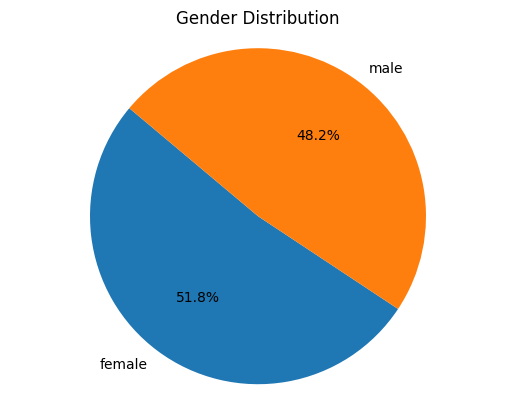

In [22]:
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

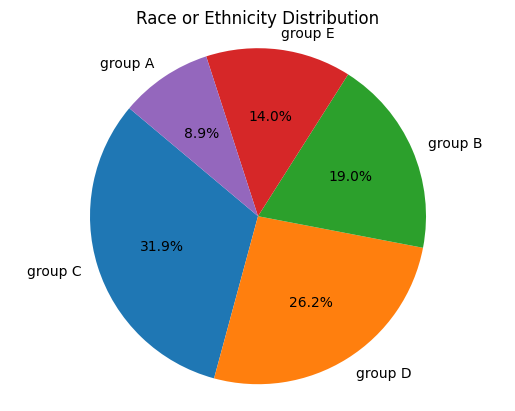

In [23]:
race_or_ethincity_counts = df['race/ethnicity'].value_counts()
plt.pie(race_or_ethincity_counts, labels=race_or_ethincity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Race or Ethnicity Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

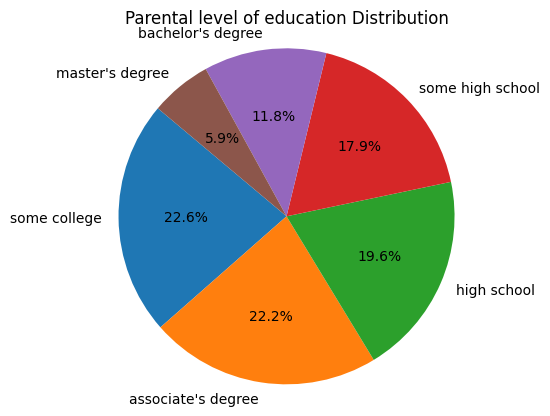

In [24]:
parental_level_of_education = df['parental level of education'].value_counts()
plt.pie(parental_level_of_education , labels = parental_level_of_education.index , autopct = '%1.1f%%',startangle=140 )
plt.title('Parental level of education Distribution')
plt.axis('equal')
plt.show()

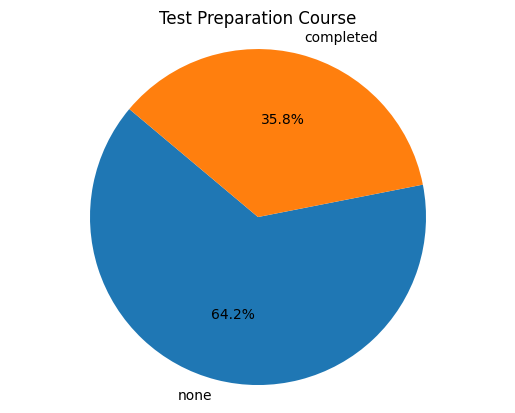

In [25]:
test_preparation_course = df['test preparation course'].value_counts()
plt.pie(test_preparation_course , labels = test_preparation_course.index , autopct = '%1.1f%%',startangle=140 )
plt.title('Test Preparation Course')
plt.axis('equal')
plt.show()

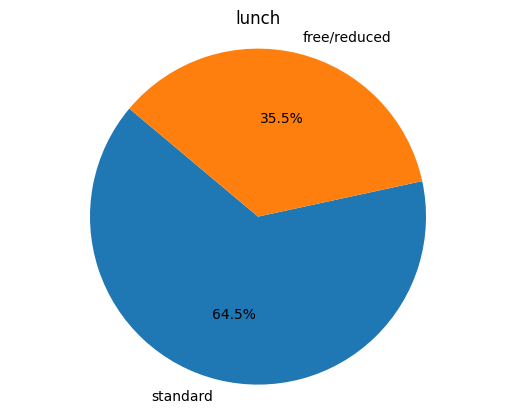

In [26]:
lunch = df['lunch'].value_counts()
plt.pie(lunch , labels = lunch.index , autopct = '%1.1f%%',startangle=140 )
plt.title('lunch')
plt.axis('equal')
plt.show()

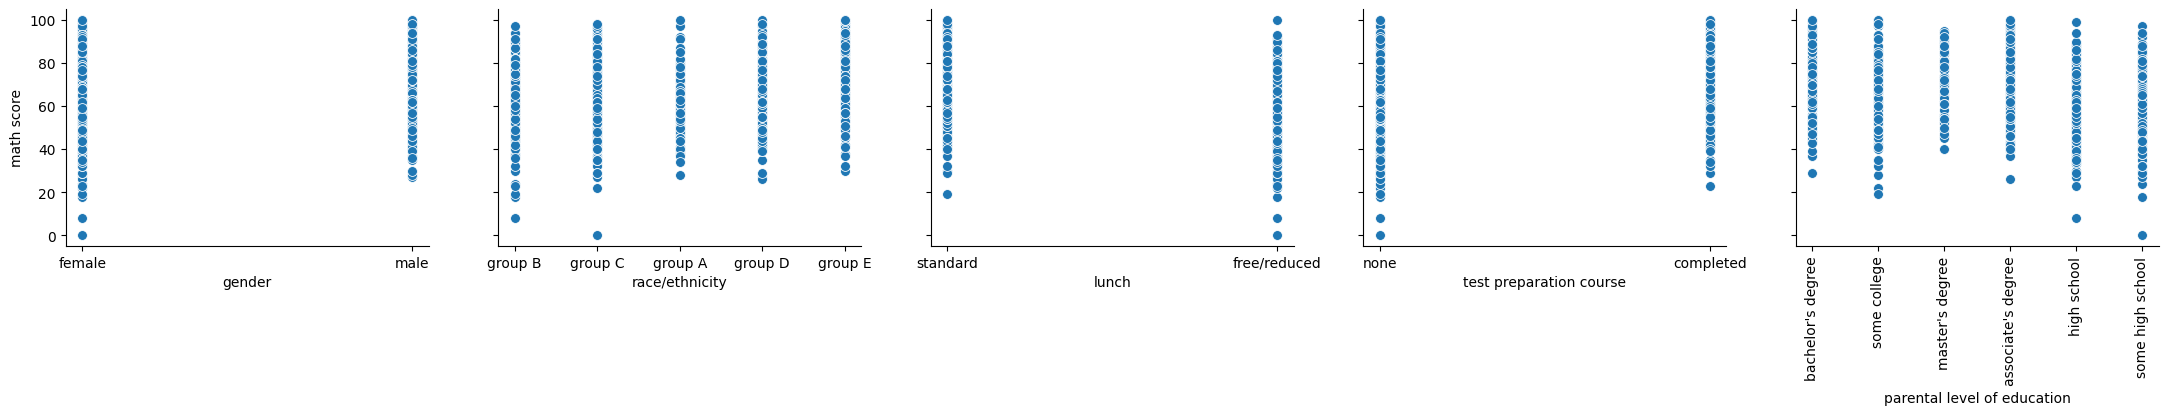

In [27]:
# Scatter pairplot
sns.pairplot(df, x_vars=['gender' , 'race/ethnicity' ,'lunch' ,'test preparation course','parental level of education'], y_vars='math score', height=3, aspect=1.5, kind='scatter', plot_kws={'s': 50})
plt.xticks(rotation = 'vertical')
plt.show()

#### 3.2 Correlation Analysis

[]

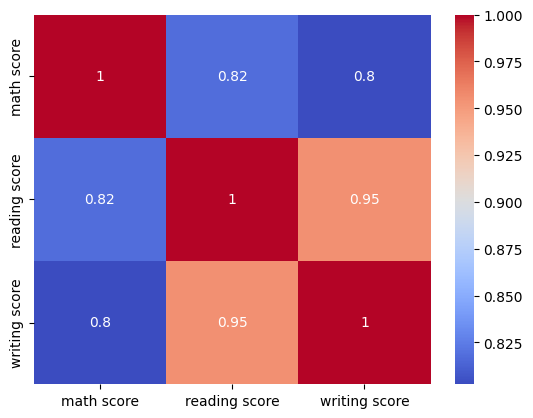

In [28]:
data = df.drop(columns = ['gender' , 'race/ethnicity' , 'parental level of education','test preparation course', 'lunch' , 'writing_score_percentage','reading_score_percentage',	'reading_score_grade',	'writing_score_grade'])
sns.heatmap(data.corr(), annot =True , cmap= 'coolwarm')
plt.plot()

### 4. Transformation Pipelines

#### 4.1 Custom Encoder

In [29]:
#Spitting of dataset
#X without math score , percenatage and grade columns
X = df.drop(columns = ['writing_score_percentage',	'reading_score_percentage',	'reading_score_grade',	'writing_score_grade' , 'math score'])
#Y it is math score column
Y = df['math score']

In [46]:
#OrdinalEncoder: Converts categorical variables to ordinal integers.
oe = OrdinalEncoder(categories=[
    ['some college', "associate's degree", 'high school', 'some high school', "bachelor's degree", "master's degree"],
    ['group A', 'group B', 'group C', 'group D','group E']
])

In [47]:
encoded_features = oe.fit_transform(df[['parental level of education', 'race/ethnicity']])
X['parental level of education'] = encoded_features[:, 0]
X['race/ethnicity'] = encoded_features[:, 1]

In [48]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,1.0,4.0,standard,none,72,74
1,female,2.0,0.0,standard,completed,90,88
2,female,1.0,5.0,standard,none,95,93
3,male,0.0,1.0,free/reduced,none,57,44
4,male,2.0,0.0,standard,none,78,75


#### 4.2 Pipeline

In [49]:
#It will convert categorial data into binary vectors/format i.e. 0,1
#This OneHotEncoder is done on parameters like gender,lunch and test preparation course
trf1 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0, 3, 4])
], remainder='passthrough')

#StandardScaler: Normalize data by subtracting mean and scaling to variance.
# Standard Scaling is done on numerical data which include columns : reading score and writing score
trf2 = ColumnTransformer([
    ('std', StandardScaler(), [5, 6])
], remainder='passthrough')

#Linear regression: it Predicts output value based on linear relationship with input variables.
trf3 = LinearRegression()
#Creation of Pipeline
pipe_linear = make_pipeline(trf1,trf2,trf3)

### 5. Model Development

#### 5.1 Data Preparation

In [50]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 , stratify = X['gender'])

#### 5.2 Model Development Without Hyperparameter Tuning(Grid Search Cv and randomized Search Cv)


In [51]:
#Fits linear regression model to training data and targets.
pipe_linear.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 3, 4])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std', StandardScaler(),
                                                  [5, 6])])),
                ('linearregression', LinearRegression())])

In [52]:
#Metrics
Y_predict_test = pipe_linear.predict(X_test)
print("R2_score on test dataset",r2_score(Y_test,Y_predict_test))
print("Root Mean square error in test dataset",mean_squared_error(Y_test,Y_predict_test))
Y_predict_train = pipe_linear.predict(X_train)
print("R2_score on train dataset",r2_score(Y_train,Y_predict_train))
print("Root Mean square error in train dataset",mean_squared_error(Y_train,Y_predict_train))

R2_score on test dataset 0.859825884446173
Root Mean square error in test dataset 29.07181720022106
R2_score on train dataset 0.8688175099488489
Root Mean square error in train dataset 30.822947576078576


In [ ]:
#SVR
trf1 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0, 3, 4])
], remainder='passthrough')

trf2 = ColumnTransformer([
    ('std', StandardScaler(), [5, 6])
], remainder='passthrough')

#Creates Support Vector Regressor with RBF kernel and C=1000.Here, RBF stands for Radial Basis Function
#Kernel: Function transforming data; C: SVM error regularization parameter.
trf3 = SVR(C=1000 , kernel = 'rbf')

pipe = make_pipeline(trf1,trf2,trf3)
pipe.fit(X_train,Y_train)
#Metrics
Y_predict_test = pipe.predict(X_test)
print("R2_score on test dataset",r2_score(Y_test,Y_predict_test))
print("Root Mean square error in test dataset",mean_squared_error(Y_test,Y_predict_test))
Y_predict_train = pipe.predict(X_train)
print("R2_score on train dataset",r2_score(Y_train,Y_predict_train))
print("Root Mean square error in train dataset",mean_squared_error(Y_train,Y_predict_train))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2_score on test dataset 0.8593351381423733
Root Mean square error in test dataset 28.898889027718567
R2_score on train dataset 0.8688731053048794
Root Mean square error in train dataset 30.895003529916327


In [ ]:
#Random Forest Regression
trf1 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0, 3, 4])
], remainder='passthrough')

trf2 = ColumnTransformer([
    ('std', StandardScaler(), [5, 6])
], remainder='passthrough')

#Random Forest Regressor: Ensemble of decision trees for regression modeling.
trf3 = RandomForestRegressor(
    n_estimators=150,#It's the number of decision tree.Here it is 150 decision tree,higher the no of decision tree better will be the preformance but upto a certain point only
    random_state=10, #Seed for random number generation
    max_samples=0.5, #Maximum number of samples for each tree
    max_features=0.75, #Maximum number of features for each tree
    max_depth=5 #Maximum depth of each decision tree.
    )

pipe = make_pipeline(trf1,trf2,trf3)
pipe.fit(X_train,Y_train)
Y_predict_test = pipe.predict(X_test)
print("R2_score on test dataset",r2_score(Y_test,Y_predict_test))
print("Root Mean square error in test dataset",mean_squared_error(Y_test,Y_predict_test))
Y_predict_train = pipe.predict(X_train)
print("R2_score on train dataset",r2_score(Y_train,Y_predict_train))
print("Root Mean square error in train dataset",mean_squared_error(Y_train,Y_predict_train))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2_score on test dataset 0.8468571015913403
Root Mean square error in test dataset 31.462438934994633
R2_score on train dataset 0.8784753760749606
Root Mean square error in train dataset 28.632598170385517


In [ ]:
#XGB Regressor
trf1 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0, 3, 4])
], remainder='passthrough')

trf2 = ColumnTransformer([
    ('std', StandardScaler(), [5, 6])
], remainder='passthrough')

#Gradient boosting decision trees for regression tasks.
trf3 = XGBRegressor(
     colsample_bylevel = 1.0, #Subsampling ratio of columns for each level.
     colsample_bytree = 1.0, #Subsampling ratio of columns for each tree.
     learning_rate = 0.03, #Step size shrinkage for gradient boosting.
     max_depth = 3,  #Maximum depth of tree
     n_estimators = 150 #Number of Boosted Trees
)

pipe = make_pipeline(trf1,trf2,trf3)
pipe.fit(X_train,Y_train)
Y_predict_test = pipe.predict(X_test)
print("R2_score on test dataset",r2_score(Y_test,Y_predict_test))
print("Root Mean square error in test dataset",mean_squared_error(Y_test,Y_predict_test))
Y_predict_train = pipe.predict(X_train)
print("R2_score on train dataset",r2_score(Y_train,Y_predict_train))
print("Root Mean square error in train dataset",mean_squared_error(Y_train,Y_predict_train))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2_score on test dataset 0.8552105727541823
Root Mean square error in test dataset 29.746260260781344
R2_score on train dataset 0.8873513610875874
Root Mean square error in train dataset 26.541314083057905


In [ ]:
#Decision Tree Regressor
trf1 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0, 3, 4])
], remainder='passthrough')

trf2 = ColumnTransformer([
    ('std', StandardScaler(), [5, 6])
], remainder='passthrough')

#It works by recursively partitioning the data into subsets based on features, aiming to create decision rules that predict the target variable.
trf3 = DecisionTreeRegressor(
                             max_depth=10, #Maximum depth of a tree.
                             min_samples_split=7, #Minimum samples required to split a node.
                             min_samples_leaf=10, #Minimum samples required in a leaf nod
                             max_features=0.95, #Maximum number of features considered for splitting
                             random_state=5, #Seed for random number generation.
                             max_leaf_nodes=100 #Maximum number of leaf nodes.
                             )

pipe = make_pipeline(trf1,trf2,trf3)
pipe.fit(X_train,Y_train)
Y_predict_test = pipe.predict(X_test)
print("R2_score on test dataset",r2_score(Y_test,Y_predict_test))
print("Root Mean square error in test dataset",mean_squared_error(Y_test,Y_predict_test))
Y_predict_train = pipe.predict(X_train)
print("R2_score on train dataset",r2_score(Y_train,Y_predict_train))
print("Root Mean square error in train dataset",mean_squared_error(Y_train,Y_predict_train))

R2_score on test dataset 0.8132925871285213
Root Mean square error in test dataset 38.35809976969564
R2_score on train dataset 0.8690067469564833
Root Mean square error in train dataset 30.863516020754705


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data = [['Linear Regression',85.95,86.89] , ['SVM' , 85.93,86.88] , ['Random Forest Regressor',84.68,87.84],['XGB Regressor',85.52,88.73],['Decision Tree Regressor',81.32,86.90]]
Column = ['Algorithm' ,'Test result','Train Result']
result = pd.DataFrame(data , columns = Column)
result

,Algorithm,Test result,Train Result
0,Linear Regression,85.95,86.89
1,SVM,85.93,86.88
2,Random Forest Regressor,84.68,87.84
3,XGB Regressor,85.52,88.73
4,Decision Tree Regressor,81.32,86.90


### We can see that without using Hyperparameter Tuning, SVM and Linear regression were giving better result and overfitting was also tackled.

### 6. Hyperparameter Tuning


#### RandomizedSearchCV: Randomly selects hyperparameters for optimization.

#### GridSearchCV: Exhaustively searches hyperparameters within a defined grid.

#### Decision Tree

In [ ]:
#Decision Tree Regressor using grid search cv
trf1 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0, 3, 4])
], remainder='passthrough')

trf2 = ColumnTransformer([
    ('std', StandardScaler(), [5, 6])
], remainder='passthrough')
param_grid = {
    'max_depth': [5,10,15,20],
    'min_samples_split': [5,10,15,20],
    'min_samples_leaf': [5,10,15],
    'max_features': [0.5,0.75,0.95],
    'random_state': [2,4,6,8,10],
    'max_leaf_nodes': [100,150,200]
}

# Define the DecisionTreeRegressor with GridSearchCV
trf3 = GridSearchCV(DecisionTreeRegressor(), param_grid)

# Create the pipeline
pipe_dectree_grid = make_pipeline(trf1, trf2, trf3)

# Fit the pipeline
pipe_dectree_grid.fit(X_train, Y_train)

# Predict on test data
Y_predict_test = pipe_dectree_grid.predict(X_test)
Y_predict_train = pipe_dectree_grid.predict(X_train)

# Calculate evaluation metrics
r2_test = r2_score(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
r2_train = r2_score(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)

print("R2_score on train dataset:", r2_train)
print("Root Mean Square Error on train dataset:", mse_train)
print("R2_score on test dataset:", r2_test)
print("Root Mean Square Error on test dataset:", mse_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2_score on train dataset: 0.8989846895473529
Root Mean Square Error on train dataset: 23.800368187368186
R2_score on test dataset: 0.7715333022847625
Root Mean Square Error on test dataset: 46.937335000439546


In [ ]:
#Decision Tree using Randomised Search CV
trf1 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0, 3, 4])
], remainder='passthrough')

trf2 = ColumnTransformer([
    ('std', StandardScaler(), [5, 6])
], remainder='passthrough')

#Randint(low,high,size),It Generates random integers within specified range.
param_grid = {
    'max_depth': randint(2,21,4),
    'min_samples_split': randint(2,21,4),
    'min_samples_leaf': randint(5,21,5),
    'max_features': [0.5,0.75,0.95],
    'random_state': randint(2,10,2),
    'max_leaf_nodes': randint(100,201,10)
}

# Define the DecisionTreeRegressor with RandomizedSearchCV
trf3 = RandomizedSearchCV(DecisionTreeRegressor(), param_grid)

# Create the pipeline
pipe_dectree_rand = make_pipeline(trf1, trf2, trf3)

# Fit the pipeline
pipe_dectree_rand.fit(X_train, Y_train)

# Predict on test data
Y_predict_test = pipe_dectree_rand.predict(X_test)
Y_predict_train = pipe_dectree_rand.predict(X_train)

# Calculate evaluation metrics
r2_test = r2_score(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
r2_train = r2_score(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)

print("R2_score on train dataset:", r2_train)
print("Root Mean Square Error on train dataset:", mse_train)
print("R2_score on test dataset:", r2_test)
print("Root Mean Square Error on test dataset:", mse_test)

R2_score on train dataset: 0.8610278673184893
Root Mean Square Error on train dataset: 32.743431770713926
R2_score on test dataset: 0.8034528588574865
Root Mean Square Error on test dataset: 40.37962249834517


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


##### SVM

In [ ]:
# SVM using Grid search CV
trf1 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0, 3, 4])
], remainder='passthrough')

trf2 = ColumnTransformer([
    ('std', StandardScaler(), [5, 6])
], remainder='passthrough')

param_grid = {
    'kernel' : ['rbf','poly','linear'],
    'C' : [200,400,600,800,1000]
}

# Define the DecisionTreeRegressor with GridSearchCV
trf3 = GridSearchCV(SVR(), param_grid)

# Create the pipeline
pipe_SVR_grid = make_pipeline(trf1, trf2, trf3)

# Fit the pipeline
pipe_SVR_grid.fit(X_train, Y_train)

# Predict on test data
Y_predict_test_SVM = pipe_SVR_grid.predict(X_test)
Y_predict_train_SVM = pipe_SVR_grid.predict(X_train)

# Calculate evaluation metrics
r2_test = r2_score(Y_test, Y_predict_test_SVM)
mse_test = mean_squared_error(Y_test, Y_predict_test_SVM)
r2_train = r2_score(Y_train, Y_predict_train_SVM)
mse_train = mean_squared_error(Y_train, Y_predict_train_SVM)

print("R2_score on train dataset:", r2_train)
print("Root Mean Square Error on train dataset:", mse_train)
print("R2_score on test dataset:", r2_test)
print("Root Mean Square Error on test dataset:", mse_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2_score on train dataset: 0.8688731053048794
Root Mean Square Error on train dataset: 30.895003529916327
R2_score on test dataset: 0.8593351381423733
Root Mean Square Error on test dataset: 28.898889027718567


In [ ]:
# SVM using Randomized Search CV
trf1 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0, 3, 4])
], remainder='passthrough')

trf2 = ColumnTransformer([
    ('std', StandardScaler(), [5, 6])
], remainder='passthrough')
param_grid = {
    'kernel' : ['rbf','poly','linear'],
    'C' : randint(100,1001,100)
}

# Define the DecisionTreeRegressor with RandomizedSearchCV
trf3 = RandomizedSearchCV(SVR(), param_grid)

# Create the pipeline
pipe_SVR_rand = make_pipeline(trf1, trf2, trf3)

# Fit the pipeline
pipe_SVR_rand.fit(X_train, Y_train)

# Predict on test data
Y_predict_test = pipe_SVR_rand.predict(X_test)
Y_predict_train = pipe_SVR_rand.predict(X_train)

# Calculate evaluation metrics
r2_test = r2_score(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
r2_train = r2_score(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)

print("R2_score on train dataset:", r2_train)
print("Root Mean Square Error on train dataset:", mse_train)
print("R2_score on test dataset:", r2_test)
print("Root Mean Square Error on test dataset:", mse_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2_score on train dataset: 0.8690436762263032
Root Mean Square Error on train dataset: 30.854815060329347
R2_score on test dataset: 0.8596491905417801
Root Mean Square Error on test dataset: 28.834368540373752


#### XGB Regression

In [ ]:
#XGB Regressor using grid search CV
trf1 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0, 3, 4])
], remainder='passthrough')

trf2 = ColumnTransformer([
    ('std', StandardScaler(), [5, 6])
], remainder='passthrough')
param_grid = {
    'colsample_bylevel' : [0.5,0.75,1.0],
     'colsample_bytree' : [0.5,0.75,1.0],
     'learning_rate' : [0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1],
     'max_depth' : [2,3,4,5,6,7,8,9],
     'n_estimators' : [100,150,200,250]
}

# Define the DecisionTreeRegressor with GridSearchCV
trf3 = GridSearchCV(XGBRegressor(), param_grid)

# Create the pipeline
pipe_xgb_grid = make_pipeline(trf1, trf2, trf3)

# Fit the pipeline
pipe_xgb_grid.fit(X_train, Y_train)

# Predict on test data
Y_predict_test = pipe_xgb_grid.predict(X_test)
Y_predict_train = pipe_xgb_grid.predict(X_train)

# Calculate evaluation metrics
r2_test = r2_score(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
r2_train = r2_score(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)

print("R2_score on train dataset:", r2_train)
print("Root Mean Square Error on train dataset:", mse_train)
print("R2_score on test dataset:", r2_test)
print("Root Mean Square Error on test dataset:", mse_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2_score on train dataset: 0.9045909391836134
Root Mean Square Error on train dataset: 22.47947133623344
R2_score on test dataset: 0.8577132852169028
Root Mean Square Error on test dataset: 29.23209056144553


In [ ]:
#XGB Regressor using Randomised Search CV
trf1 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0, 3, 4])
], remainder='passthrough')

trf2 = ColumnTransformer([
    ('std', StandardScaler(), [5, 6])
], remainder='passthrough')

#uniform: Generates random numbers with uniform distribution.
param_grid = {
    'colsample_bylevel': uniform(0.1, 1.0),
    'colsample_bytree': uniform(0.1, 1.0),
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(2, 11),
    'n_estimators': randint(100, 251)
}

# Define the XGBRegressor with RandomizedSearchCV
trf3 = RandomizedSearchCV(XGBRegressor(), param_grid)

# Create the pipeline
pipe_XGB_rand = make_pipeline(trf1, trf2, trf3)

# Fit the pipeline
pipe_XGB_rand.fit(X_train, Y_train)

# Predict on test data
Y_predict_test = pipe_XGB_rand.predict(X_test)
Y_predict_train = pipe_XGB_rand.predict(X_train)

# Calculate evaluation metrics
r2_test = r2_score(Y_test, Y_predict_test)
mse_test = mean_squared_error(Y_test, Y_predict_test)
r2_train = r2_score(Y_train, Y_predict_train)
mse_train = mean_squared_error(Y_train, Y_predict_train)

print("R2_score on train dataset:", r2_train)
print("Root Mean Square Error on train dataset:", mse_train)
print("R2_score on test dataset:", r2_test)
print("Root Mean Square Error on test dataset:", mse_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2_score on train dataset: 0.9250343774915064
Root Mean Square Error on train dataset: 17.66276229912479
R2_score on test dataset: 0.847880544846408
Root Mean Square Error on test dataset: 31.25217766104335


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1090, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
   

### 7. Final Predication
#### 7.1 Model Selection

In [ ]:
#Creating Table/database for the result
data = [['Decision Tree','Grid Search Cv',77.15,89.89],['Decision Tree','Randomized Search Cv',80.34,86.1]
        , ['SVM','Grid Search CV',85.98,86.88],['SVM','Randomized Search Cv',85.96,86.90],
         ['XGB Regressor','Grid Search CV',85.77,90.45],['XGB Regressor','Randomized Search Cv',84.788,92.5]]
Column = ['Algorithm','Hyperparameter Tuning' ,'Test result','Train Result']
result_With_hypertuning_parameters = pd.DataFrame(data , columns = Column)
result_With_hypertuning_parameters

,Algorithm,Hyperparameter Tuning,Test result,Train Result
0,Decision Tree,Grid Search Cv,77.150,89.89
1,Decision Tree,Randomized Search Cv,80.340,86.10
2,SVM,Grid Search CV,85.980,86.88
3,SVM,Randomized Search Cv,85.960,86.90
4,XGB Regressor,Grid Search CV,85.770,90.45
5,XGB Regressor,Randomized Search Cv,84.788,92.50


In [ ]:
result # Without using Hypertuning parameters

,Algorithm,Test result,Train Result
0,Linear Regression,85.95,86.89
1,SVM,85.93,86.88
2,Random Forest Regressor,84.68,87.84
3,XGB Regressor,85.52,88.73
4,Decision Tree Regressor,81.32,86.90


### We can see SVM (Using Hypertuning Parameters 'Grid Search CV') is giving better result in comparison to other.

#### 7.2 Visualize Predications

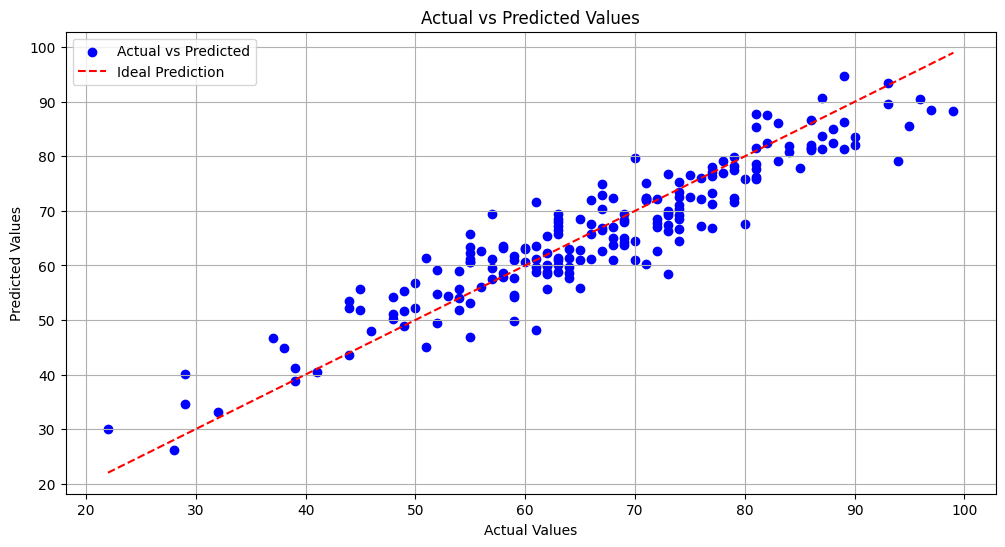

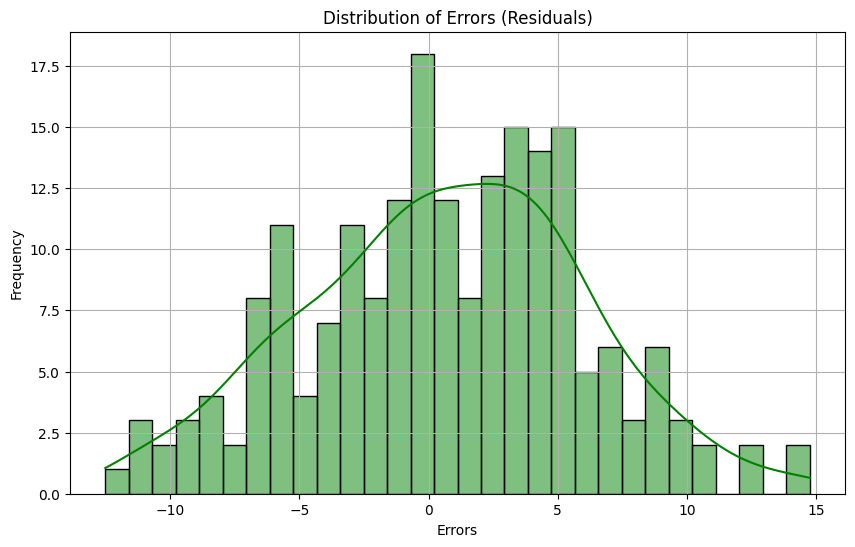

In [ ]:
#Display a scatter plot of actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.scatter(Y_test, Y_predict_test_SVM, color='blue', label='Actual vs Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', label='Ideal Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Distribution of errors (residuals)
errors = Y_test - Y_predict_test_SVM
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color='green')
plt.title('Distribution of Errors (Residuals)')
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

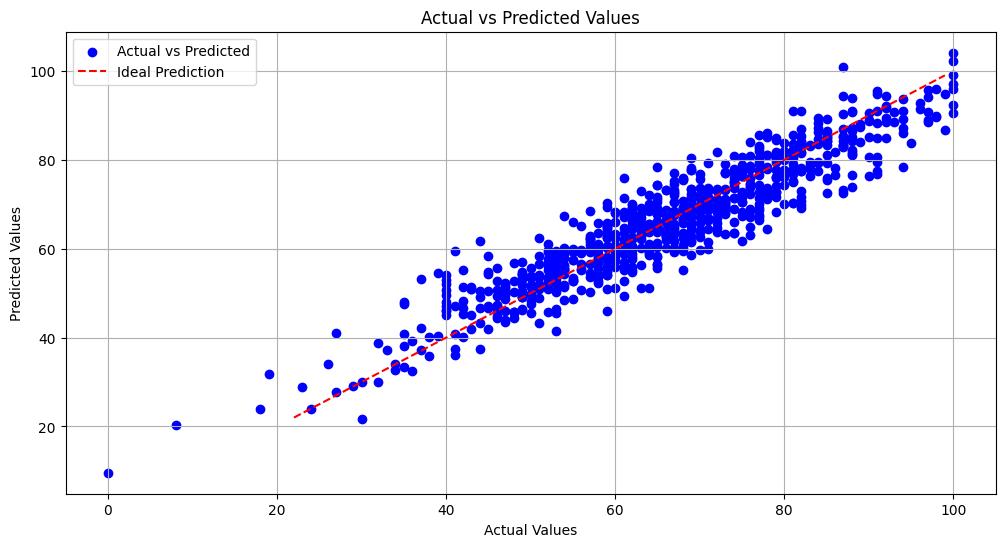

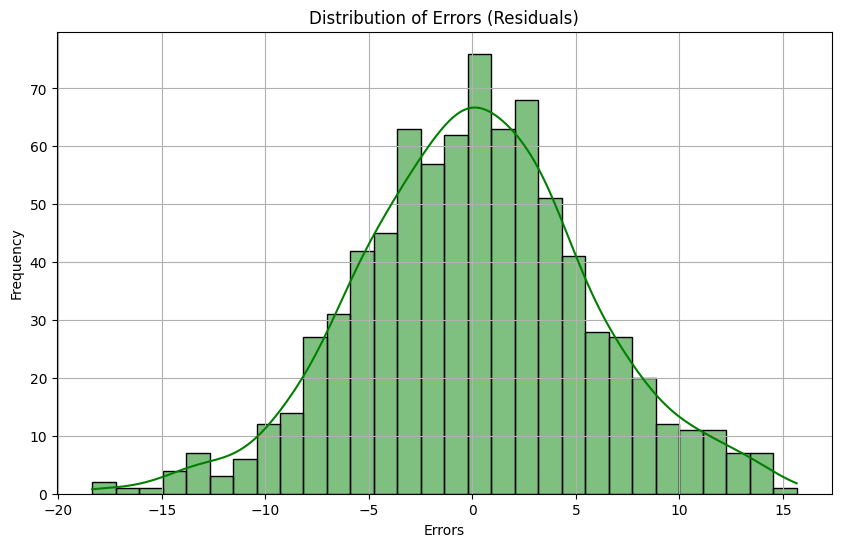

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(Y_train, Y_predict_train_SVM, color='blue', label='Actual vs Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', label='Ideal Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Distribution of errors (residuals)
errors = Y_train - Y_predict_train_SVM
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color='green')
plt.title('Distribution of Errors (Residuals)')
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()